In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0


In [28]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,True,False,False,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,178,0,0.8,0,1,...,False,True,False,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,...,False,True,False,False,False,True,False,False,True,False


In [29]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0,1,...,True,False,False,True,False,False,False,True,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,1,...,False,True,False,True,False,False,False,False,True,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0,1,...,True,False,False,False,False,True,False,False,True,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0,1,...,False,True,False,False,False,True,False,False,True,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0,1,...,False,True,False,False,False,True,False,False,True,False


In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (242, 23)
Test size: (61, 23)


In [31]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean CV R^2 Score:", cv_scores.mean())


Cross-Validation R^2 Scores: [0.36129242 0.41510168 0.43151049 0.4906407  0.45066667]
Mean CV R^2 Score: 0.42984239191468754


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R^2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV R^2 Score: 0.4397806631427105


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_reg = grid_search.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))
print("R^2 Score:", r2_score(y_test, y_pred_reg))

MAE: 0.23217206609419727
MSE: 0.10696391980858828
RMSE: 0.32705338984420923
R^2 Score: 0.571106955164055


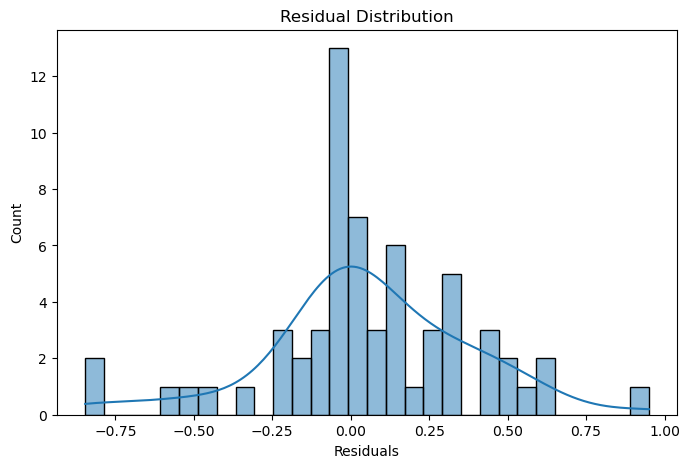

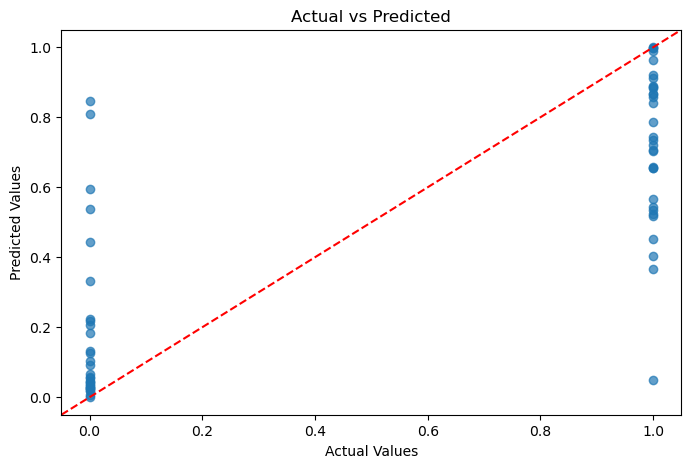

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_reg

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_reg, alpha=0.7)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


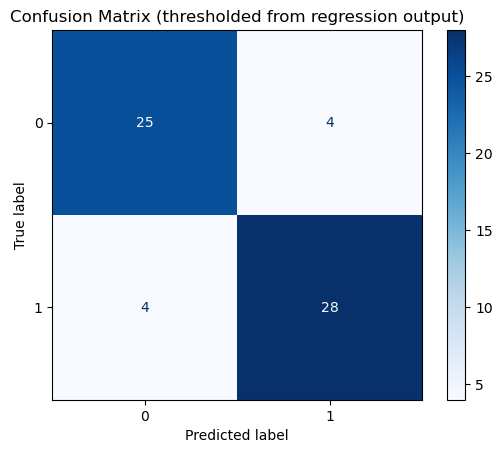

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert regression output to binary (e.g., using threshold 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_reg]

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (thresholded from regression output)")
plt.show()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [38]:
df = pd.read_csv(url)
X = df.drop("target", axis=1)
y = df["target"]

In [39]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['cp', 'restecg', 'slope', 'thal']

In [40]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

In [41]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [42]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
pipeline.fit(X_train_pipe, y_train_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cp', 'restecg', 'slope',
                                                   'thal'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [44]:
print("Pipeline R^2 Score:", pipeline.score(X_test_pipe, y_test_pipe))

Pipeline R^2 Score: 0.5483239224137932
